In [1]:
!pip install kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akshatdhaybhai","key":"3432f3e195befee9e24442f2b2567960"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!mv /content/kaggle.json ~/.kaggle

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets lits

usage: kaggle datasets [-h] {list,files,download,create,version,init,metadata,status} ...
kaggle datasets: error: argument command: invalid choice: 'lits' (choose from 'list', 'files', 'download', 'create', 'version', 'init', 'metadata', 'status')


In [8]:
! kaggle datasets download -d austinreese/craigslist-carstrucks-data

100% 262M/262M [00:01<00:00, 242MB/s]
100% 262M/262M [00:01<00:00, 218MB/s]


In [9]:
!unzip /content/craigslist-carstrucks-data.zip

Archive:  /content/craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
data = pd.read_csv("/content/vehicles.csv")

In [12]:
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [13]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [14]:
data.shape

(426880, 26)

In [15]:
data.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [16]:
data.drop(labels=data.columns[0:4],axis=1,inplace=True)

In [17]:
data.drop(labels="title_status",axis=1,inplace=True)

In [18]:
data.drop(labels=data.columns[14:],axis=1,inplace=True)

In [19]:
data.drop(labels="VIN",axis=1,inplace=True)

In [20]:
data.shape

(426880, 13)

In [21]:
data.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color'],
      dtype='object')

In [22]:
data.dropna(axis=0,thresh=12,inplace=True)

In [23]:
data.isna().sum()

price               0
year                0
manufacturer     4059
model             975
condition       13570
cylinders        1766
fuel                0
odometer          408
transmission       11
drive            2491
size            36793
type             1893
paint_color      2856
dtype: int64

In [24]:
data["odometer"].fillna(value=data["odometer"].mean(),inplace=True)

In [25]:
data["condition"].fillna(value=data["condition"].value_counts().index[data["condition"].value_counts().argmax()],inplace=True)

In [26]:
data["paint_color"].fillna(value=data["paint_color"].value_counts().index[data["paint_color"].value_counts().argmax()],inplace=True)

In [27]:
data["transmission"].fillna(value=data["transmission"].value_counts().index[data["transmission"].value_counts().argmax()],inplace=True)

In [28]:
data["manufacturer"].fillna(value=data["manufacturer"].value_counts().index[data["manufacturer"].value_counts().argmax()],inplace=True)

In [29]:
crosstab_df_mdl_yr_mfc = pd.crosstab(data["model"],[data["year"],data["manufacturer"]],rownames=["model"],colnames=["year","manufacturer"])

In [30]:
crosstab_df_mdl_yr_mfc

year          1900.0 1901.0    1905.0   1913.0      1918.0 1920.0 1923.0  \
manufacturer   acura   ford chevrolet cadillac ford   ford   ford   ford   
model                                                                      
"t"                0      0         0        0    1      0      0      0   
%                  0      0         0        0    0      0      0      0   
& altima           0      0         0        0    0      0      0      0   
'99 H1 Hummer      0      0         0        0    0      0      0      0   
(210)              0      0         0        0    0      0      0      0   
...              ...    ...       ...      ...  ...    ...    ...    ...   
zl1 camaro         0      0         0        0    0      0      0      0   
zr2 sonoma         0      0         0        0    0      0      0      0   
zx2                0      0         0        0    0      0      0      0   
♿                  0      0         0        0    0      0      0      0   
♿ vmi              0      0         0        0    0      0      0      0   

year          1924.0       ... 2021.0                                       \
manufacturer   dodge ford  ...    ram rover subaru toyota volkswagen volvo   
model                      ...                                               
"t"                0    0  ...      0     0      0      0          0     0   
%                  0    0  ...      0     0      0      0          0     0   
& altima           0    0  ...      0     0      0      0          0     0   
'99 H1 Hummer      0    0  ...      0     0      0      0          0     0   
(210)              0    0  ...      0     0      0      0          0     0   
...              ...  ...  ...    ...   ...    ...    ...        ...   ...   
zl1 camaro         0    0  ...      0     0      0      0          0     0   
zr2 sonoma         0    0  ...      0     0      0      0          0     0   
zx2                0    0  ...      0     0      0      0          0     0   
♿                  0    0  ...      0     0      0      0          0     0   
♿ vmi              0    0  ...      0     0      0      0          0     0   

year             2022.0                         
manufacturer  chevrolet ford mitsubishi toyota  
model                                           
"t"                   0    0          0      0  
%                     0    0          0      0  
& altima              0    0          0      0  
'99 H1 Hummer         0    0          0      0  
(210)                 0    0          0      0  
...                 ...  ...        ...    ...  
zl1 camaro            0    0          0      0  
zr2 sonoma            0    0          0      0  
zx2                   0    0          0      0  
♿                     0    0          0      0  
♿ vmi                 0    0          0      0  

[14487 rows x 1708 columns]

In [31]:
crosstab_df_mdl_yr_mfc.columns[-1]

(2022.0, 'toyota')

In [32]:
freq_dist = crosstab_df_mdl_yr_mfc[crosstab_df_mdl_yr_mfc.columns[-1]]

In [33]:
freq_dist

model
"t"              0
%                0
& altima         0
'99 H1 Hummer    0
(210)            0
                ..
zl1 camaro       0
zr2 sonoma       0
zx2              0
♿                0
♿ vmi            0
Name: (2022.0, toyota), Length: 14487, dtype: int64

In [34]:
freq_dist.index[freq_dist.argmax()]

'mighty max'

In [35]:
mapping_dict = dict()
for single_col in crosstab_df_mdl_yr_mfc.columns:
  mapping_dict[single_col] = crosstab_df_mdl_yr_mfc[single_col].index[crosstab_df_mdl_yr_mfc[single_col].argmax()]

In [36]:
for k in mapping_dict.keys():
  boolean_mask = (data["year"] == k[0]) & (data["manufacturer"] == k[1])
  data.loc[boolean_mask,"model"] = data.loc[boolean_mask,"model"].fillna(value=mapping_dict[k],inplace=False)

In [37]:
data["model"].fillna(value=data["model"].value_counts().index[data["model"].value_counts().argmax()],inplace=True)

In [38]:
data["cylinders"].fillna(value=data["cylinders"].value_counts().index[data["cylinders"].value_counts().argmax()],inplace=True)

In [39]:
crosstab_df_type_mfc = pd.crosstab(data["type"],data["manufacturer"],rownames=["type"],colnames=["manufacturer"])

In [40]:
mapping_dict = dict()
for single_col in crosstab_df_type_mfc.columns:
  mapping_dict[single_col] = crosstab_df_type_mfc[single_col].index[crosstab_df_type_mfc[single_col].argmax()]

In [41]:
for k in mapping_dict.keys():
  boolean_mask = (data["manufacturer"] == k)
  data.loc[boolean_mask,"type"] = data.loc[boolean_mask,"type"].fillna(value=mapping_dict[k],inplace=False)

In [42]:
data["drive"].fillna(value=data["drive"].value_counts().index[data["drive"].value_counts().argmax()],inplace=True)

In [43]:
crosstab_df_size_mfc_mdl = pd.crosstab(data["size"],[data["manufacturer"], data["model"]],rownames=["size"],colnames=["manufacturer","model"])

In [44]:
mapping_dict = dict()
for single_col in crosstab_df_size_mfc_mdl.columns:
  mapping_dict[single_col] = crosstab_df_size_mfc_mdl[single_col].index[crosstab_df_size_mfc_mdl[single_col].argmax()]

In [45]:
for k in mapping_dict.keys():
  boolean_mask = (data["manufacturer"] == k[0]) & (data["model"] == k[1])
  data.loc[boolean_mask,"size"] = data.loc[boolean_mask,"size"].fillna(value=mapping_dict[k],inplace=False)

In [46]:
data["size"].fillna(value=data["size"].value_counts().index[data["size"].value_counts().argmax()],inplace=True)

In [47]:
data.isna().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

In [48]:
data.to_csv("/content/cleaned_vehicles.csv")

In [49]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
!cp /content/cleaned_vehicles.csv /content/drive/MyDrive/

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [52]:
!cp /content/drive/MyDrive/cleaned_vehicles.csv /content

In [53]:
data = pd.read_csv("/content/cleaned_vehicles.csv")

In [54]:
data = data.iloc[:,1:]

In [55]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black
1,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,4wd,full-size,pickup,black
2,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,4wd,full-size,pickup,silver
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,4wd,mid-size,truck,grey
4,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,4wd,mid-size,pickup,red


In [56]:
data.shape

(144017, 13)

In [57]:
categorical_columns = list()
for single_column in data.columns:
  if data[single_column].dtype == "object":
    categorical_columns.append(single_column)

In [58]:
print(categorical_columns)

['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type', 'paint_color']


In [59]:
for single_column in ["condition","cylinders","transmission","drive","size"]:

  print("The unique values in {} column are {}".format(single_column,data[single_column].unique()))

The unique values in condition column are ['excellent' 'good' 'like new' 'new' 'fair' 'salvage']
The unique values in cylinders column are ['6 cylinders' '8 cylinders' '4 cylinders' '5 cylinders' '10 cylinders'
 '3 cylinders' 'other' '12 cylinders']
The unique values in transmission column are ['automatic' 'other' 'manual']
The unique values in drive column are ['rwd' '4wd' 'fwd']
The unique values in size column are ['full-size' 'mid-size' 'compact' 'sub-compact']


In [60]:
condition_encoding_dict = {'excellent':6, 'good':3, 'like new':4, 'new':5, 'fair':2, 'salvage':1}
cylinders_encoding_dict = {'6 cylinders':6, '8 cylinders':8, '4 cylinders':4, '5 cylinders':5,'10 cylinders':10, '3 cylinders':3, 'other':7, '12 cylinders':12}
transmission_encoding_dict = {'automatic':3, 'other':2, 'manual':1}
drive_encoding_dict = {'rwd':2, '4wd':3, 'fwd':1}
size_encoding_dict = {'full-size':4, 'mid-size':3, 'compact':1, 'sub-compact':2}

In [61]:
data["condition"].replace(to_replace=condition_encoding_dict.keys(),value=condition_encoding_dict.values(),inplace=True)

data["cylinders"].replace(to_replace=cylinders_encoding_dict.keys(),value=cylinders_encoding_dict.values(),inplace=True)

data["transmission"].replace(to_replace=transmission_encoding_dict.keys(),value=transmission_encoding_dict.values(),inplace=True)

data["drive"].replace(to_replace=drive_encoding_dict.keys(),value=drive_encoding_dict.values(),inplace=True)

data["size"].replace(to_replace=size_encoding_dict.keys(),value=size_encoding_dict.values(),inplace=True)

In [62]:
for single_column in ["manufacturer","model","fuel","type","paint_color"]:

  print("The number of unique values in {} column are {}".format(single_column,data[single_column].unique().shape[0]))

The number of unique values in manufacturer column are 41
The number of unique values in model column are 14487
The number of unique values in fuel column are 5
The number of unique values in type column are 13
The number of unique values in paint_color column are 12


In [63]:
data["model"].replace(to_replace=data["model"].unique(),value=list(range(data["model"].unique().shape[0])),inplace=True)

Text(0, 0.5, 'Frequency of Integer Labels')

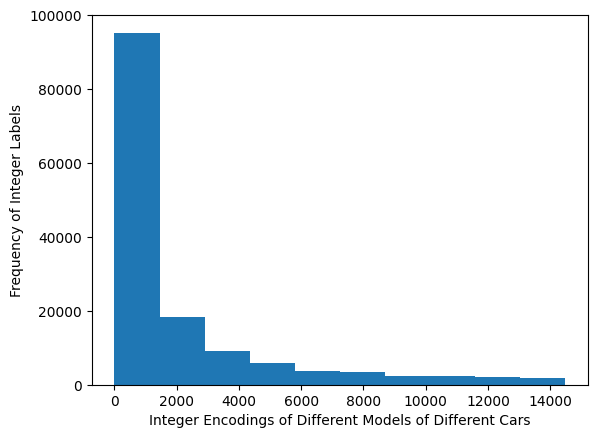

In [64]:
plt.hist(data["model"])
plt.xlabel("Integer Encodings of Different Models of Different Cars")
plt.ylabel("Frequency of Integer Labels")

In [65]:
models_freq_dist = dict(data["model"].value_counts())

In [66]:
area_cut_off = 0.7
top_models = list()
total_area = 0
total_frequency = data.shape[0]

for k,v in models_freq_dist.items():

  if (total_area/total_frequency) > area_cut_off:
    break

  top_models.append(k)

  total_area += models_freq_dist[k]

In [67]:
k = len(top_models)
print(k)

773


In [68]:
updated_mapping_dict = dict()

for i,item in enumerate(models_freq_dist.items()):

  if i <= (k-1):
    updated_mapping_dict[item[0]] = i
  else:
    updated_mapping_dict[item[0]] = k

In [69]:
data["model"].replace(to_replace=updated_mapping_dict.keys(),
                       value=updated_mapping_dict.values(),inplace=True)

In [70]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,ford,131,6,6,gas,128000.0,3,2,4,truck,black
1,27990,2012.0,gmc,165,3,8,gas,68696.0,2,3,4,pickup,black
2,34590,2016.0,chevrolet,66,3,6,gas,29499.0,2,3,4,pickup,silver
3,35000,2019.0,toyota,6,6,6,gas,43000.0,3,3,3,truck,grey
4,29990,2016.0,chevrolet,88,3,6,gas,17302.0,2,3,3,pickup,red


In [71]:
def convert_to_ohe_df(column_name):

  model_unique_values = data[column_name].unique().shape[0]
  identity_matrix = np.eye(model_unique_values,model_unique_values)
  ohe_models = identity_matrix[data[column_name]]
  df_column_names = [column_name+str(i) for i in range(model_unique_values)]
  column_df = pd.DataFrame(data=ohe_models,columns=df_column_names)

  return column_df

In [72]:
for single_column in ["manufacturer","fuel","type","paint_color"]:

  column_unique_values = data[single_column].unique()
  data[single_column].replace(to_replace=column_unique_values,value=list(range(column_unique_values.shape[0])),inplace=True)

In [73]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,0,131,6,6,0,128000.0,3,2,4,0,0
1,27990,2012.0,1,165,3,8,0,68696.0,2,3,4,1,0
2,34590,2016.0,2,66,3,6,0,29499.0,2,3,4,1,1
3,35000,2019.0,3,6,6,6,0,43000.0,3,3,3,0,2
4,29990,2016.0,2,88,3,6,0,17302.0,2,3,3,1,3


In [74]:
for single_column in ["manufacturer","model","fuel","type","paint_color"]:

  column_df = convert_to_ohe_df(single_column)
  data.drop(labels=single_column,axis=1,inplace=True)
  data = pd.concat([data,column_df],axis=1)

In [75]:
data.head()

,price,year,condition,cylinders,odometer,transmission,drive,size,manufacturer0,manufacturer1,...,paint_color2,paint_color3,paint_color4,paint_color5,paint_color6,paint_color7,paint_color8,paint_color9,paint_color10,paint_color11
0,15000,2013.0,6,6,128000.0,3,2,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27990,2012.0,3,8,68696.0,2,3,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34590,2016.0,3,6,29499.0,2,3,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35000,2019.0,6,6,43000.0,3,3,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29990,2016.0,3,6,17302.0,2,3,3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
data["year"] = data["year"].max() - data["year"]

In [77]:
data.head()

,price,year,condition,cylinders,odometer,transmission,drive,size,manufacturer0,manufacturer1,...,paint_color2,paint_color3,paint_color4,paint_color5,paint_color6,paint_color7,paint_color8,paint_color9,paint_color10,paint_color11
0,15000,9.0,6,6,128000.0,3,2,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27990,10.0,3,8,68696.0,2,3,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34590,6.0,3,6,29499.0,2,3,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35000,3.0,6,6,43000.0,3,3,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29990,6.0,3,6,17302.0,2,3,3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
data.to_csv("/content/updated_cleaned_vehicles.csv",index=False)

In [79]:
!cp /content/updated_cleaned_vehicles.csv /content/drive/MyDrive/

In [80]:
!cp /content/drive/MyDrive/updated_cleaned_vehicles.csv /content/

In [81]:
data = pd.read_csv("/content/updated_cleaned_vehicles.csv")

In [82]:
data.head()

,price,year,condition,cylinders,odometer,transmission,drive,size,manufacturer0,manufacturer1,...,paint_color2,paint_color3,paint_color4,paint_color5,paint_color6,paint_color7,paint_color8,paint_color9,paint_color10,paint_color11
0,15000,9.0,6,6,128000.0,3,2,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27990,10.0,3,8,68696.0,2,3,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34590,6.0,3,6,29499.0,2,3,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35000,3.0,6,6,43000.0,3,3,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29990,6.0,3,6,17302.0,2,3,3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
def apply_pca(X,preserved_variance_percentage):

  unprojected_X = np.array(X)
  X_cov = np.array(X.cov())
  Q_lambda_QT = np.linalg.svd(X_cov)
  total_variance = np.sum(Q_lambda_QT[1])
  variance_sum = 0
  num_eigen_vectors = 1

  if preserved_variance_percentage == 1:
    projected_X = np.matmul(unprojected_X,Q_lambda_QT[0])
    projected_X = pd.DataFrame(data=projected_X,
                             columns=["feature_"+str(i) for i in range(X.shape[1])])
  else:
    for variance in Q_lambda_QT[1]:

      if (variance_sum/total_variance) > preserved_variance_percentage:
        break

      variance_sum += variance
      num_eigen_vectors += 1

    projected_X = np.matmul(unprojected_X,Q_lambda_QT[0][:,0:num_eigen_vectors])

    projected_X = pd.DataFrame(data=projected_X,
                             columns=["feature_"+str(i) for i in range(num_eigen_vectors)])

  return projected_X

In [84]:
projected_X = apply_pca(data.iloc[:,1:],0.99)

In [85]:
projected_X.head()

,feature_0,feature_1
0,-128000.000046,8.341875
1,-68696.000053,9.773978
2,-29499.000032,5.930864
3,-43000.000015,2.789146
4,-17302.000032,5.997120


In [86]:
projected_X = (projected_X - projected_X.mean())/projected_X.std()

In [87]:
projected_data = pd.concat([projected_X,data["price"]],axis=1)

<Figure size 4000x4000 with 0 Axes>

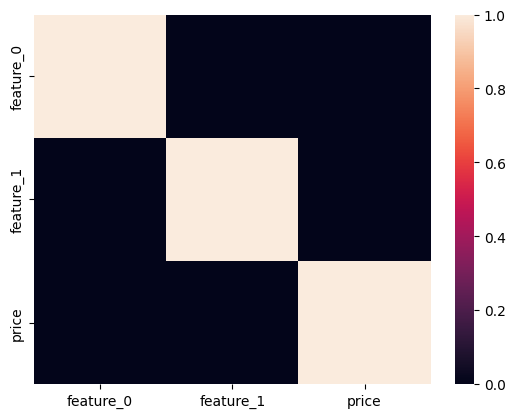

<Figure size 4000x4000 with 0 Axes>

In [88]:
sns.heatmap(projected_data.corr(),xticklabels=True,yticklabels=True)
plt.figure(figsize=(40,40))

In [89]:
training_data_len = int(0.7 * projected_data.shape[0])
training_data = projected_data.iloc[0:training_data_len,:]

testing_data = projected_data.iloc[training_data_len:,:]

In [90]:
training_data.shape

(100811, 3)

In [91]:
testing_data.shape

(43206, 3)

In [92]:
training_data.head()

,feature_0,feature_1,price
0,-0.071109,-0.354026,15000
1,0.182435,-0.212009,27990
2,0.350015,-0.593118,34590
3,0.292294,-0.904671,35000
4,0.402161,-0.586547,29990


In [93]:
X_train_transpose = np.array(training_data.iloc[:,0:projected_data.shape[1]-1])
y_train = np.array(training_data["price"]).reshape(-1,1)

X_test_transpose = np.array(testing_data.iloc[:,0:projected_data.shape[1]-1])
y_test = np.array(testing_data["price"]).reshape(-1,1)

In [94]:
X_train_transpose.shape

(100811, 2)

In [95]:
X_train_transpose

array([[-0.07110874, -0.35402559],
       [ 0.18243525, -0.21200871],
       [ 0.35001523, -0.59311755],
       ...,
       [ 0.04474835, -0.04900468],
       [ 0.33023757, -0.80108677],
       [ 0.4333841 ,  5.46755883]])

In [96]:
y_train.shape

(100811, 1)

In [97]:
N_train = y_train.shape[0]

In [98]:
def del_by_del_thetas(theta_0,theta):

  y_pred = (theta_0 + np.matmul(X_train_transpose,theta))
  error_vector_transpose = np.transpose(y_pred - y_train)

  del_by_del_theta = (2/N_train)*np.transpose(np.matmul(error_vector_transpose,
                                                        X_train_transpose))
  del_by_del_theta_0 = (2/N_train)*np.sum(error_vector_transpose)

  return [del_by_del_theta_0,del_by_del_theta]

In [99]:
def mae(theta_0,theta):

  y_pred = (theta_0 + np.matmul(X_train_transpose,theta))
  abs_error_vector = np.abs(y_pred - y_train)

  return np.mean(abs_error_vector)

In [100]:
epsilon = 10**(-3)
tol = 10**(-3)
#theta_0_initial = np.random.randn(1,)[0]
theta_0_initial = 0
theta_initial = np.zeros((X_train_transpose.shape[1],1))
iteration = 0

while True:

  initial_gradients = del_by_del_thetas(theta_0_initial,
                                        theta_initial)

  theta_0_final = theta_0_initial - (epsilon * initial_gradients[0])
  theta_final = theta_initial - (epsilon * initial_gradients[1])

  initial_gradient_vector = np.concatenate((np.array([[initial_gradients[0]]]),
                                           initial_gradients[1]))

  initial_mae = mae(theta_0_initial,theta_initial)
  final_mae = mae(theta_0_final,theta_final)

  if abs(initial_mae - final_mae) < tol:
    break

  initial_mae = mae(theta_0_initial,theta_initial)

  print("The Value of MAE at iteration # {} is {}".format(iteration,initial_mae))

  theta_0_initial = theta_0_final
  theta_initial = theta_final

  iteration += 1

Streaming output truncated to the last 5000 lines.
The Value of MAE at iteration # 295 is 26936.19061475345
The Value of MAE at iteration # 296 is 26944.30399941065
The Value of MAE at iteration # 297 is 26952.447623911172
The Value of MAE at iteration # 298 is 26960.624186875397
The Value of MAE at iteration # 299 is 26968.830580606478
The Value of MAE at iteration # 300 is 26977.066227155363
The Value of MAE at iteration # 301 is 26985.329509721003
The Value of MAE at iteration # 302 is 26993.63462875542
The Value of MAE at iteration # 303 is 27001.9897526554
The Value of MAE at iteration # 304 is 27010.39251877577
The Value of MAE at iteration # 305 is 27018.839838159067
The Value of MAE at iteration # 306 is 27027.319324904427
The Value of MAE at iteration # 307 is 27035.837896744797
The Value of MAE at iteration # 308 is 27044.404112055643
The Value of MAE at iteration # 309 is 27053.001181871583
The Value of MAE at iteration # 310 is 27061.636991382802
The Value of MAE at iterati